# Employee salary negotiations while hiring Predictive Statistics-Linear Regression Analysis.
# Company wants to predict possible salary for offer letter generation
* Target Variable is 'MonthlyIncome'

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\Ankit Dsouza\Desktop\tanushree notes\Talent analytics Case study file\Linear Regression\data.csv')

In [3]:
HTML(df.head().to_html())

In [4]:
df.shape

(1470, 27)

In [5]:
df.describe()

Age  DistanceFromHome  EnvironmentSatisfaction     JobLevel  \
count  1470.000000       1470.000000              1470.000000  1470.000000   
mean     38.433333          9.192517                 2.721769     2.063946   
std      11.451647          8.106864                 1.093082     1.106940   
min      19.000000          1.000000                 1.000000     1.000000   
25%      28.000000          2.000000                 2.000000     1.000000   
50%      38.000000          7.000000                 3.000000     2.000000   
75%      49.000000         14.000000                 4.000000     3.000000   
max      58.000000         29.000000                 4.000000     5.000000   

       MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count    1470.000000         1470.000000        1470.000000   
mean     6502.931293            2.693197          15.209524   
std      4707.956783            2.498009           3.659938   
min      1009.000000            0.000000          11.000000   
25%      2911.000000            1.000000          12.000000   
50%      4919.000000            2.000000          14.000000   
75%      8379.000000            4.000000          18.000000   
max     19999.000000            9.000000          25.000000   

       RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  ...  \
count               1470.000000       1470.000000            1470.000000  ...   
mean                   2.712245          0.793878               2.799320  ...   
std                    1.081209          0.852077               1.289271  ...   
min                    1.000000          0.000000               0.000000  ...   
25%                    2.000000          0.000000               2.000000  ...   
50%                    3.000000          1.000000               3.000000  ...   
75%                    4.000000          1.000000               3.000000  ...   
max                    4.000000          3.000000               6.000000  ...   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       TotalWorkingYears  YearsOfExperience  NoOfProject  Communication  \
count        1470.000000        1470.000000  1470.000000    1470.000000   
mean           11.279592           4.095238     5.168707       0.291156   
std             7.780782           3.511206     2.673542       0.454450   
min             0.000000           0.000000     0.000000       0.000000   
25%             6.000000           2.000000     3.000000       0.000000   
50%            10.000000           3.000000     5.000000       0.000000   
75%            15.000000           7.000000     7.000000       1.000000   
max            40.000000          17.000000    16.000000       1.000000   

       shiftDifferentials  NumOfReports  ProCertifications  
count         1470.000000   1470.000000        1470.000000  
mean             0.506122      2.014286           0.630612  
std              0.500133      0.811213           0.482803  
min              0.000000      1.000000           0.000000  
25%              0.000000      1.000000           0.000000  
50%              1.000000      2.000000           1.000000  
75%              1.000000      3.000000           1.000000  
max              1.000000      3.000000           1.000000  

[8 rows x 21 columns]

In [6]:
df.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
TotalWorkingYears           0
YearsOfExperience           0
NoOfProject                 0
Communication               0
shiftDifferentials          0
NumOfReports                0
ProCertifications           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TrainingTimesLastYear       1470 non-null int64
WorkLifeBalance             1470 non-null int64
YearsAtCompany              1470 non-null int64
YearsInCurrentRole     

# Exploratory Data Analysis

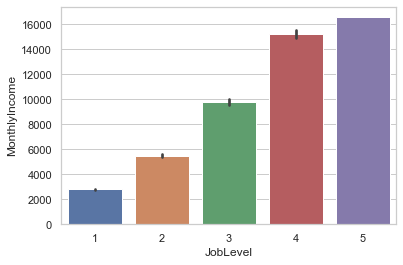

In [35]:
sns.barplot(x='JobLevel', y='MonthlyIncome', data=df)

* As we can see 'JobLevel' increases monthlyincome increses. It has a positive releated with target variable.

* Has we can see the employee with 0 and 1 'NumCompaniesWorked' has a low 'MonthlyIncome', rest has a higher 'MonthlyIncome'.

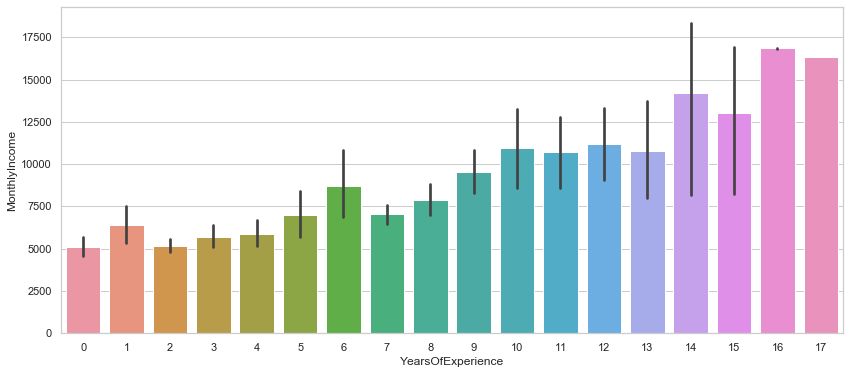

In [9]:
plt.figure(figsize = (14,6))
sns.barplot(x='YearsOfExperience', y='MonthlyIncome', data=df)

* Here we can notice a trend as 'totalworkingyears' increase 'monthlyincome' increases. It is positive related. 

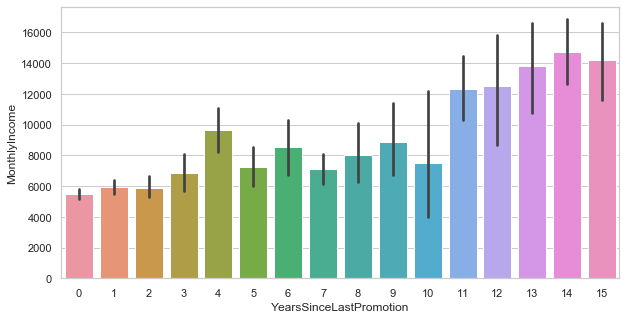

In [10]:
plt.figure(figsize = (10,5))
sns.barplot(x='YearsSinceLastPromotion', y='MonthlyIncome', data=df)

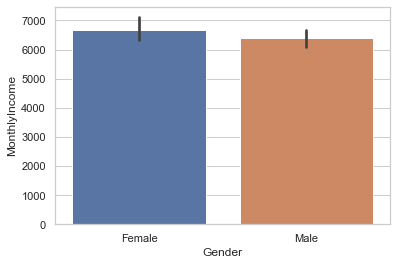

In [11]:
sns.barplot(x='Gender', y='MonthlyIncome', data=df)

* There is no difference in salary of Male and Female. 'MonthlyIncome' is not depend on 'Gender'.

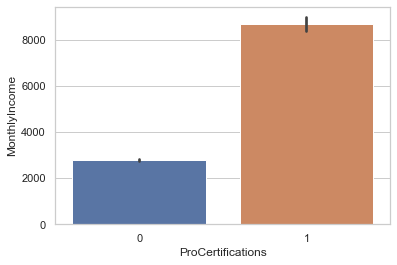

In [12]:
sns.barplot(x='ProCertifications', y='MonthlyIncome', data=df)
# 0 represent No Professional Certifications and 1 represent they did Professional Certifications.

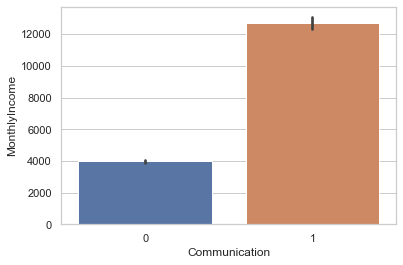

In [13]:
sns.barplot(x='Communication', y='MonthlyIncome', data=df)
# 0 represent they are not good in Communication and 1 represent they are good in Communication

## Checking Outlier in dataset

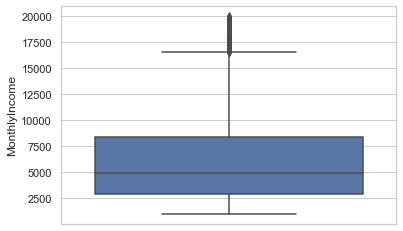

In [14]:
sns.boxplot(y='MonthlyIncome',data=df)

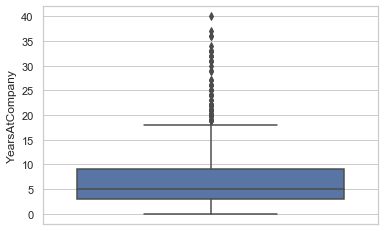

In [15]:
sns.boxplot(y='YearsAtCompany',data=df)

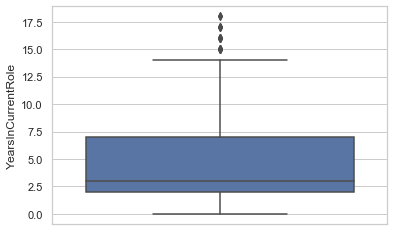

In [16]:
sns.boxplot(y='YearsInCurrentRole',data=df)

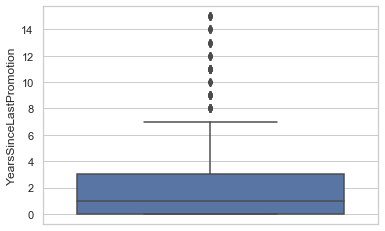

In [17]:
sns.boxplot(y='YearsSinceLastPromotion',data=df)

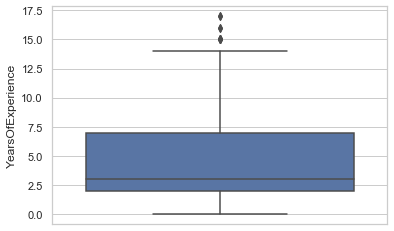

In [18]:
sns.boxplot(y='YearsOfExperience',data=df)

* Dataset has a outlier has we can see in BoxPlot

# Data Preprocessing
* Assign Lables to categorical data

In [19]:
df.Department=(LabelEncoder().fit_transform(df.Department))
df.EducationField=(LabelEncoder().fit_transform(df.EducationField))
df.Gender=(LabelEncoder().fit_transform(df.Gender))
df.JobRole=(LabelEncoder().fit_transform(df.JobRole))
df.MaritalStatus=(LabelEncoder().fit_transform(df.MaritalStatus))
df.BusinessTravel=(LabelEncoder().fit_transform(df.BusinessTravel))


In [20]:
df.head()

Age  BusinessTravel  Department  DistanceFromHome  EducationField  \
0   23               2           2                 1               1   
1   51               1           1                 8               1   
2   34               2           1                 2               4   
3   20               1           1                 3               1   
4   56               2           1                 2               3   

   EnvironmentSatisfaction  Gender  JobLevel  JobRole  MaritalStatus  ...  \
0                        2       0         2        7              2  ...   
1                        3       1         2        6              1  ...   
2                        4       1         1        2              2  ...   
3                        4       0         1        6              1  ...   
4                        1       1         1        2              1  ...   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   TotalWorkingYears  YearsOfExperience  NoOfProject  Communication  \
0                  8                  5            5              0   
1                 10                  7            5              0   
2                  7                  0            5              0   
3                  8                  0            4              0   
4                  6                  2            4              0   

   shiftDifferentials  NumOfReports  ProCertifications  
0                   1             1                  1  
1                   1             3                  1  
2                   0             2                  0  
3                   1             1                  0  
4                   0             2                  0  

[5 rows x 27 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int32
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
EducationField              1470 non-null int32
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
MaritalStatus               1470 non-null int32
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TrainingTimesLastYear       1470 non-null int64
WorkLifeBalance             1470 non-null int64
YearsAtCompany              1470 non-null int64
YearsInCurrentRole          1

* All the varible are Numeric

## Removing Outlier

In [22]:
for x in range(0,25):
    q1=df[df.columns[x]].quantile(0.25)
    q3=df[df.columns[x]].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5* iqr
    df[df.columns[x]]=np.where(df[df.columns[x]]>high,high,df[df.columns[x]])
    df[df.columns[x]]=np.where(df[df.columns[x]]<low,low,df[df.columns[x]])

In [23]:
df.describe()

Age  BusinessTravel   Department  DistanceFromHome  \
count  1470.000000     1470.000000  1470.000000       1470.000000   
mean     38.433333        1.607483     1.260544          9.192517   
std      11.451647        0.665455     0.527792          8.106864   
min      19.000000        0.000000     0.000000          1.000000   
25%      28.000000        1.000000     1.000000          2.000000   
50%      38.000000        2.000000     1.000000          7.000000   
75%      49.000000        2.000000     2.000000         14.000000   
max      58.000000        2.000000     2.000000         29.000000   

       EducationField  EnvironmentSatisfaction       Gender     JobLevel  \
count     1470.000000              1470.000000  1470.000000  1470.000000   
mean         2.247619                 2.721769     0.600000     2.063946   
std          1.331369                 1.093082     0.490065     1.106940   
min          0.000000                 1.000000     0.000000     1.000000   
25%          1.000000                 2.000000     0.000000     1.000000   
50%          2.000000                 3.000000     1.000000     2.000000   
75%          3.000000                 4.000000     1.000000     3.000000   
max          5.000000                 4.000000     1.000000     5.000000   

           JobRole  MaritalStatus  ...  YearsAtCompany  YearsInCurrentRole  \
count  1470.000000    1470.000000  ...     1470.000000         1470.000000   
mean      4.458503       1.097279  ...        6.617687            4.207823   
std       2.461821       0.730121  ...        4.989788            3.555335   
min       0.000000       0.000000  ...        0.000000            0.000000   
25%       2.000000       1.000000  ...        3.000000            2.000000   
50%       5.000000       1.000000  ...        5.000000            3.000000   
75%       7.000000       2.000000  ...        9.000000            7.000000   
max       8.000000       2.000000  ...       18.000000           14.500000   

       YearsSinceLastPromotion  TotalWorkingYears  YearsOfExperience  \
count              1470.000000        1470.000000        1470.000000   
mean                  1.922789          11.103061           4.087415   
std                   2.478222           7.303828           3.486092   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           6.000000           2.000000   
50%                   1.000000          10.000000           3.000000   
75%                   3.000000          15.000000           7.000000   
max                   7.500000          28.500000          14.500000   

       NoOfProject  Communication  shiftDifferentials  NumOfReports  \
count  1470.000000    1470.000000         1470.000000   1470.000000   
mean      5.137415       0.291156            0.506122      2.014286   
std       2.566242       0.454450            0.500133      0.811213   
min       0.000000       0.000000            0.000000      1.000000   
25%       3.000000       0.000000            0.000000      1.000000   
50%       5.000000       0.000000            1.000000      2.000000   
75%       7.000000       1.000000            1.000000      3.000000   
max      13.000000       1.000000            1.000000      3.000000   

       ProCertifications  
count        1470.000000  
mean            0.630612  
std             0.482803  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             1.000000  
max             1.000000  

[8 rows x 27 columns]

In [24]:
# converting dtype to integer
df = df.astype(int) 
print(df.dtypes)

Age                         int32
BusinessTravel              int32
Department                  int32
DistanceFromHome            int32
EducationField              int32
EnvironmentSatisfaction     int32
Gender                      int32
JobLevel                    int32
JobRole                     int32
MaritalStatus               int32
MonthlyIncome               int32
NumCompaniesWorked          int32
PercentSalaryHike           int32
RelationshipSatisfaction    int32
StockOptionLevel            int32
TrainingTimesLastYear       int32
WorkLifeBalance             int32
YearsAtCompany              int32
YearsInCurrentRole          int32
YearsSinceLastPromotion     int32
TotalWorkingYears           int32
YearsOfExperience           int32
NoOfProject                 int32
Communication               int32
shiftDifferentials          int32
NumOfReports                int32
ProCertifications           int32
dtype: object


In [25]:
HTML(df.describe().to_html())

# Data Partition

In [26]:
data=df

In [27]:
# define our input variable (x) & output variable
x = data.drop("MonthlyIncome", axis = 1)
y = data[['MonthlyIncome']]
# split x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [28]:
# Running RFE with the output number of the variable equal to 6 
lm = LinearRegression()
rfe = RFE(lm,6)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False False False  True  True False False False False
 False False False False False False False False False  True  True False
  True  True]
[21  2  3 18  8  4  1  1 17 11  6 13  5 12  7 20 15 16 19  9 14  1  1 10
  1  1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
col = x_train.columns[rfe.support_]
col

Index(['Gender', 'JobLevel', 'NoOfProject', 'Communication', 'NumOfReports',
       'ProCertifications'],
      dtype='object')

# Correlation Matrix

In [30]:
econ_df=pd.concat([y_train,x_train],axis=1)

MonthlyIncome       Age  BusinessTravel  Department  \
MonthlyIncome                  1.000000  0.016348        0.036896    0.082310   
Age                            0.016348  1.000000        0.004078    0.045583   
BusinessTravel                 0.036896  0.004078        1.000000   -0.013070   
Department                     0.082310  0.045583       -0.013070    1.000000   
DistanceFromHome               0.003193  0.014931       -0.030305   -0.002473   
EducationField                -0.045488  0.005721        0.038784    0.031851   
EnvironmentSatisfaction       -0.028372 -0.032895        0.015524   -0.015156   
Gender                        -0.053863  0.051090       -0.051687   -0.041258   
JobLevel                       0.943029  0.021693        0.017533    0.107896   
JobRole                       -0.085332  0.080896       -0.025642    0.659295   
MaritalStatus                 -0.081835 -0.017845        0.017891    0.074195   
NumCompaniesWorked             0.135318 -0.026075        0.032336   -0.039016   
PercentSalaryHike             -0.002208 -0.009909       -0.016843   -0.005043   
RelationshipSatisfaction       0.023070 -0.013781       -0.042002   -0.032124   
StockOptionLevel               0.035980  0.041445        0.011482   -0.002079   
TrainingTimesLastYear         -0.020182  0.027270        0.000880    0.067458   
WorkLifeBalance                0.055380 -0.002943        0.002318    0.037158   
YearsAtCompany                 0.470084  0.051304       -0.014351    0.037457   
YearsInCurrentRole             0.353967  0.068269        0.004837    0.056703   
YearsSinceLastPromotion        0.300587  0.076116       -0.026414    0.053309   
TotalWorkingYears              0.764507  0.009276        0.025519   -0.005678   
YearsOfExperience              0.328292  0.043842       -0.027999    0.040267   
NoOfProject                    0.655642 -0.009011        0.025718   -0.007939   
Communication                  0.864126  0.019264        0.046595    0.107320   
shiftDifferentials            -0.056208 -0.001060       -0.041413   -0.018997   
NumOfReports                  -0.072470 -0.006767        0.083945   -0.028548   
ProCertifications              0.625290  0.028174       -0.020654    0.252985   

                          DistanceFromHome  EducationField  \
MonthlyIncome                     0.003193       -0.045488   
Age                               0.014931        0.005721   
BusinessTravel                   -0.030305        0.038784   
Department                       -0.002473        0.031851   
DistanceFromHome                  1.000000       -0.018611   
EducationField                   -0.018611        1.000000   
EnvironmentSatisfaction           0.005577        0.061806   
Gender                            0.003851       -0.006054   
JobLevel                          0.017650       -0.056547   
JobRole                          -0.006217        0.043532   
MaritalStatus                    -0.021354        0.003241   
NumCompaniesWorked               -0.006374       -0.007330   
PercentSalaryHike                 0.009838       -0.024283   
RelationshipSatisfaction          0.010442        0.022698   
StockOptionLevel                  0.048283       -0.019012   
TrainingTimesLastYear            -0.049210        0.077346   
WorkLifeBalance                   0.011853        0.053737   
YearsAtCompany                    0.012113       -0.031187   
YearsInCurrentRole                0.018032       -0.020669   
YearsSinceLastPromotion           0.011805       -0.013920   
TotalWorkingYears                 0.029239       -0.032019   
YearsOfExperience                 0.001928       -0.011666   
NoOfProject                       0.020024       -0.046876   
Communication                     0.010880       -0.044231   
shiftDifferentials                0.006140       -0.059429   
NumOfReports                      0.043087       -0.022363   
ProCertifications                 0.063016       -0.071503   

                    

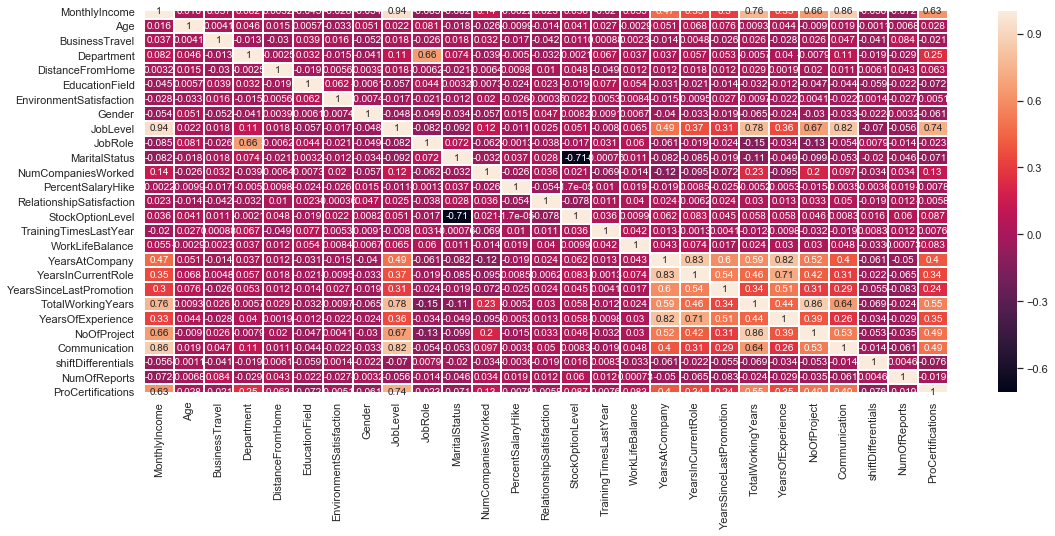

In [31]:
# calculate the correlation matrix
corr = econ_df.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
plt.figure(figsize = (18,7))
sns.heatmap(corr,annot = True,linewidths=1) # annot=True will give you value

# Multicolinearity (with the help of VIF) variance_inflation_factor

In [32]:
econ_df_before = econ_df
# the VIF does expect a constant term in the data, 
#so we need to add one using the add_constant method
X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                       107.663123
MonthlyIncome                12.633002
Age                           1.024525
BusinessTravel                1.031387
Department                    2.108694
DistanceFromHome              1.018757
EducationField                1.033029
EnvironmentSatisfaction       1.013732
Gender                        1.028799
JobLevel                     14.850071
JobRole                       1.945927
MaritalStatus                 2.070257
NumCompaniesWorked            1.225853
PercentSalaryHike             1.014344
RelationshipSatisfaction      1.028326
StockOptionLevel              2.064364
TrainingTimesLastYear         1.028821
WorkLifeBalance               1.029299
YearsAtCompany                6.372694
YearsInCurrentRole            3.394181
YearsSinceLastPromotion       1.622760
TotalWorkingYears             6.398515
YearsOfExperience             3.177329
NoOfProject                   3.900060
Communication                 4.257563
shiftDifferentials       

In [33]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [34]:
# drop columns have more than 5.0 vif value
X_train1 = vif_cal(input_data = data.drop(['Age','NoOfProject','WorkLifeBalance','JobInvolvement','TrainingTimesLastYear',
                                           'Department','Education','HourlyRate','YearsAtCompany','PercentSalaryHike',
                                           'JobLevel','EnvironmentSatisfaction','NumOfReports','BusinessTravel',
                                          'RelationshipSatisfaction','EmployeeNumber','YearsInCurrentRole','TotalWorkingYears',
                                         'JobSatisfaction'],axis=1), dependent_col='MonthlyIncome')
X_train1

KeyError: "['JobInvolvement' 'Education' 'HourlyRate' 'EmployeeNumber'\n 'JobSatisfaction'] not found in axis"

# Model Building

In [ ]:
# define our intput
x_train1 = x_train.drop(['Age','NoOfProject','WorkLifeBalance','JobInvolvement','TrainingTimesLastYear','TotalWorkingYears',
                                           'Department','Education','HourlyRate','YearsAtCompany','PercentSalaryHike',
                                           'JobLevel','EnvironmentSatisfaction','NumOfReports','BusinessTravel',
                                          'RelationshipSatisfaction','EmployeeNumber','JobSatisfaction','YearsInCurrentRole',
                                          'DailyRate','EducationField'],axis=1)
x_1 = sm.add_constant(x_train1)
# create a OLS model
model1 = sm.OLS(y_train, x_1).fit()
print(model1.summary())


# Backward Elimination

In [ ]:
X = x_train.drop(['Age','NoOfProject','WorkLifeBalance','JobInvolvement','TrainingTimesLastYear',
                                           'Department','Education','HourlyRate','YearsAtCompany','PercentSalaryHike',
                                           'JobLevel','EnvironmentSatisfaction','TotalWorkingYears',
                                          'RelationshipSatisfaction','EmployeeNumber','JobSatisfaction','YearsInCurrentRole',
                                          'DailyRate','EducationField','NumOfReports','BusinessTravel'], axis = 1)
y = y_train

In [ ]:
X.head()

In [ ]:
#Backward Elimination
cols = list(X.columns) # all column present in x
pmax = 1
while(len(cols)>0): # count of variable should be greater than zero
    p = []
    X_1 = X[cols] # all column we are assign in x_1
    X_1 = sm.add_constant(X_1) # we are adding a column with value 1
    final_model = sm.OLS(y,X_1).fit() # regression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols) # to get p-value for all variable only
    pmax = max(p) # select a max p-value
    feature_with_pmax = p.idxmax() # idmax is used to display the variable name which has max p-value
    if(pmax>0.05):
        cols.remove(feature_with_pmax)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
final_model.summary()

### we have consider final_model for feather Assumption and Validating the Train data.

# Assumption of Model
* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distributed

# Homoscedasicity

In [ ]:
Data1 = pd.concat([X,y],axis=1)
Data1['Fitted_value']=final_model.fittedvalues
Data1['Residual']=final_model.resid

In [ ]:
p = Data1.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

The null hypothesis for Breusch-pagan test is that:

* H0 = variance2i = variance2 (the variances for the errors are equal)

The alternate hypothesis (the one you are testing), is that:

* H1 = variance2i not equal variance2 (the variance arenot equal)

In [ ]:
# Run the Breusch-pagan test
_,pval2,_,f_pval2 = diag.het_breuschpagan(final_model.resid,final_model.model.exog)
print(pval2,f_pval2)

# Normality

In [ ]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line = 's')
pylab.show()

In [ ]:
# also check that the mean of the residualis approx 0
mean_residuals = sum(final_model.resid)/ len(final_model.resid)
mean_residuals

# Model Error are IID

In [ ]:
Data1['Residual'].plot.hist()

# Prediction on test data

In [ ]:
x_test2 = X[['JobRole', 'NumCompaniesWorked', 'YearsOfExperience', 'Communication', 'ProCertifications']]

In [ ]:
x_test2 = sm.add_constant(x_test2)

In [ ]:
x_test2.head()

In [ ]:
y_predict = final_model.predict(x_test2)

In [ ]:
test= pd.concat([x_test2,y],axis=1)

In [ ]:
test['Predicted']=y_predict

In [ ]:
test.head()

## With the Accuracy of 80% we can say the monthly salary of new joining employee depand on 'TotalWorkingYears' i.e work_experince and 'YearsSinceLastPromotion'.

In [ ]:
Data1.columns

In [ ]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data1['MonthlyIncome'], Data1['Fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(Data1['MonthlyIncome'], Data1['Fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

In [ ]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['MonthlyIncome'], test['Predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['MonthlyIncome'], test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))